<a href="https://colab.research.google.com/github/Rajaneesh-Netha/GITWORKSHOP/blob/main/Uber_Data_Analysis_EDAV_Course_End_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Title:-  Uber Data Analysis Dashboard
#Objective:- The objective of this project is to perform Data Analysis and Visualization on the dataset of Uber ride data.
#The aim is to explore the ride patterns across various timelines, detect missing/incorrect values and managing missing data, explore trend patterns, and visualize results.

#Tools Used:-
#Google Colab
#Numpy
#Pandas
#Matplotlib
#Seaborn

#Dataset:- Uber Data Analysis Dashboard

# Steps
#1. Data Cleaning
#2. Analysis
#3. Visualization
#4. Conclusions

In [ ]:
#Questions
#1.Compute total and average rides by day of the week
#2.Identify peak hours of Uber demand
#3.Detect and handle missing/incorrect location entries
#4.
#5.Create time-series plots and heatmaps for ride trends

In [6]:
#Importing Dataset into our Notebook
#Importing Python Libararies

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


df= pd.read_csv("/content/uber_rides.csv")
df.head()


,Date,Time,Booking ID,Booking Status,Customer ID,Vehicle Type,Pickup Location,Drop Location,Avg VTAT,Avg CTAT,...,Reason for cancelling by Customer,Cancelled Rides by Driver,Driver Cancellation Reason,Incomplete Rides,Incomplete Rides Reason,Booking Value,Ride Distance,Driver Ratings,Customer Rating,Payment Method
0,2024-03-23,12:29:38,"""CNR5884300""",No Driver Found,"""CID1982111""",eBike,Palam Vihar,Jhilmil,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2024-11-29,18:01:39,"""CNR1326809""",Incomplete,"""CID4604802""",Go Sedan,Shastri Nagar,Gurgaon Sector 56,4.9,14.0,...,NaN,NaN,NaN,1.0,Vehicle Breakdown,237.0,5.73,NaN,NaN,UPI
2,2024-08-23,08:56:10,"""CNR8494506""",Completed,"""CID9202816""",Auto,Khandsa,Malviya Nagar,13.4,25.8,...,NaN,NaN,NaN,NaN,NaN,627.0,13.58,4.9,4.9,Debit Card
3,2024-10-21,17:17:25,"""CNR8906825""",Completed,"""CID2610914""",Premier Sedan,Central Secretariat,Inderlok,13.1,28.5,...,NaN,NaN,NaN,NaN,NaN,416.0,34.02,4.6,5.0,UPI
4,2024-09-16,22:08:00,"""CNR1950162""",Completed,"""CID9933542""",Bike,Ghitorni Village,Khan Market,5.3,19.6,...,NaN,NaN,NaN,NaN,NaN,737.0,48.21,4.1,4.3,UPI


In [ ]:
#Q1:- Compute total and average rides by day of the week

#Concept Explanation:-
#Find duplicates and drop them
#We will convert Date and Time (strings) to datetime format
#Extract the day if week (Mon,Tue,Wed,Thu,Fri,Sat,Sun)
#Calculate no.of rides per day
#Find avg rides per day
#This helps in identifying which days are busiest and whether rides are evenly distributed across the week.

In [7]:
#Code Implementation

# Check for missing values and duplicates
df.isnull().sum()
df.duplicated().sum()

# Drop duplicates if any
df = df.drop_duplicates()

# Convert Date column
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# Specify the format H:M:S and extract only the time part
df['Time'] = pd.to_datetime(df['Time'], format='%H:%M:%S', errors='coerce').dt.time

df.dropna(subset=['Date', 'Time'], inplace=True)

# Converting Date to Day
df['DayOfWeek'] = df['Date'].dt.day_name()

# Calculating total rides by day
total_rides = df['DayOfWeek'].value_counts().sort_index()

# Calculating average rides per each day
avg_rides = df.groupby('DayOfWeek').size() / df['Date'].dt.date.nunique()

# Combining Total Rides and Avg Rides into one DataFrame
rides_info = pd.DataFrame({
    'Total Rides': total_rides,
    'Average Rides per Day': avg_rides
}).reindex(['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])

rides_info

,Total Rides,Average Rides per Day
DayOfWeek,,
Monday,21644,59.298630
Tuesday,21391,58.605479
Wednesday,21413,58.665753
Thursday,21215,58.123288
Friday,21397,58.621918
Saturday,21542,59.019178
Sunday,21398,58.624658


In [ ]:
#Conclusion:-
#The variance in total rides per day is very low.
#While Monday has the most no.of rides with an avg rides of 59.298630
#Saturday has the next highest no.of bookings with an avg rides of 59.019178
#Daily averages remain around 58–59 rides,by this we can say that ride demand doesn’t fluctuate drastically from day to day.

In [ ]:
#Q2.Identify peak hours of Uber demand

#Concept Explanation:-
#To determine which hours of the day experience the highest Uber ride demand.
#Extract the hour from the Date/Time column.

#Count no.of rides per hour

In [8]:
df.isnull().sum()
df.duplicated().sum()
# Drop duplicates if any
df = df.drop_duplicates()

# Convert 'Date' and 'Time' columns to string type to ensure concatenation
df['Date'] = df['Date'].astype(str)
df['Time'] = df['Time'].astype(str)

#Creating a new 'DateTime' coloumn for
df['DateTime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'], errors='coerce')

# Drop any rows that failed the datetime conversion
df.dropna(subset=['DateTime'], inplace=True)

# Creating a new column 'Hour' by extracting the hour from the 'DateTime'
df['Hour'] = df['DateTime'].dt.hour

    # value_counts() sorts the results
peak_hours = df['Hour'].value_counts()

#Combining both into one DataFrame
peak_hours_df = pd.DataFrame({
    'Hour of Day': peak_hours.index,
    'Total Rides': peak_hours.values
})

print("Total Rides by Hour:")
print(peak_hours_df.to_string())


Total Rides by Hour:
    Hour of Day  Total Rides
0            18        12397
1            19        11047
2            17        11044
3            16         9633
4            20         9630
5            10         9577
6            11         8390
7             9         8234
8            15         8202
9            21         8103
10           14         7031
11           12         7006
12            8         6861
13           13         5470
14            7         5450
15           22         5441
16            6         4160
17            5         2786
18           23         2762
19            3         1383
20            0         1373
21            1         1360
22            2         1339
23            4         1321


In [ ]:
#Conclusion:
#Total no.of rides is max in the evening (i.e 17hrs-19hrs)
#Where at 18hrs records the most no.of bookings followed by 19hrs
#Demand is at its lowest at Late Nights, around 1,300–1,400 rides.
#Highest demand: Evenings.
#Moderate demand: Daytime.
#Lowest demand: Late-night/early morning.

In [ ]:
#Q3.Detect and handle missing/incorrect location entries

#Concept Explanation:-
#Finding the null values of Pickup and Drop locations
#If found then drop that ride by using dropna() method
#Displaying before and after handling missing/incorrect data

In [9]:
# Show the total number of rides we started with
print("Original number of rides: ",len(df))

# 2. Drop rows that are missing a 'Pickup Location' or 'Drop Location'
# The 'dropna' function is great for removing missing values.
# We tell it to only look in the location columns.
df_cleaned = df.dropna(subset=['Pickup Location', 'Drop Location'])

# 3. Show how many rides are left after cleaning
print("Number of rides after removing missing locations: ",len(df_cleaned))

# Calculate and show how many incomplete rides were removed
rows_removed = len(df) - len(df_cleaned)
print("Total rides removed: ",rows_removed)


print("\nCleaned data:")
print(df_cleaned.head())

Original number of rides:  150000
Number of rides after removing missing locations:  150000
Total rides removed:  0

Cleaned data:
         Date      Time    Booking ID   Booking Status   Customer ID  \
0  2024-03-23  12:29:38  "CNR5884300"  No Driver Found  "CID1982111"   
1  2024-11-29  18:01:39  "CNR1326809"       Incomplete  "CID4604802"   
2  2024-08-23  08:56:10  "CNR8494506"        Completed  "CID9202816"   
3  2024-10-21  17:17:25  "CNR8906825"        Completed  "CID2610914"   
4  2024-09-16  22:08:00  "CNR1950162"        Completed  "CID9933542"   

    Vehicle Type      Pickup Location      Drop Location  Avg VTAT  Avg CTAT  \
0          eBike          Palam Vihar            Jhilmil       NaN       NaN   
1       Go Sedan        Shastri Nagar  Gurgaon Sector 56       4.9      14.0   
2           Auto              Khandsa      Malviya Nagar      13.4      25.8   
3  Premier Sedan  Central Secretariat           Inderlok      13.1      28.5   
4           Bike     Ghitorni Villag

In [ ]:
#Conclusion:-
#There is not even a single ride with incorrect pickup or drop locations
#The dataset is clean with no incomplete rides

In [ ]:
#Q4.Revenue Contribution by Vehicle Type

#Concept Explanation:-
"""How much each vehicle type contributes to the total revenue (i.e., sum of Booking Value).
A pie chart helps you visualize the percentage share of total earnings across different vehicle types — like Bike, Auto, Go Sedan, Premier Sedan, etc"""

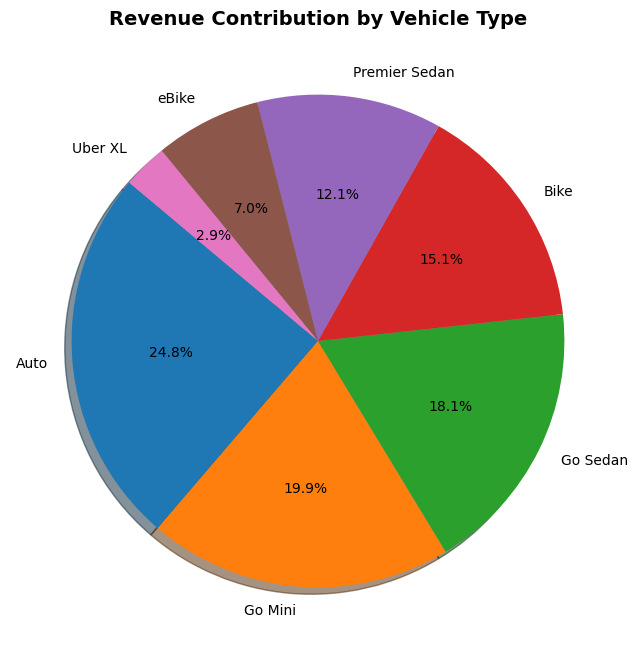

In [10]:
revenue_by_vehicle = df.groupby('Vehicle Type')['Booking Value'].sum().sort_values(ascending=False)

# Dropping null values
revenue_by_vehicle = revenue_by_vehicle.dropna()

# Creating a pie
plt.figure(figsize=(8, 8))
plt.pie(
    revenue_by_vehicle,
    labels=revenue_by_vehicle.index,
    autopct='%1.1f%%',
    startangle=140,
    shadow=True
)
plt.title('Revenue Contribution by Vehicle Type', fontsize=14, fontweight='bold')
plt.show()

In [ ]:
#Conclusion:-
"""The largest slice shows the vehicle type contributing the most revenue — i.e Auto(24.8%)"""

In [ ]:
#Q5:-Create time-series plots and heatmaps for ride trends

#Concept Explanation:-
#plotting the total number of rides over days, weeks, or months helps us identify trends, seasonality, and anomalies.
#plotting days of the week vs. hours of the day helps us understand when demand is highest or lowest.
#Line plots show continuous time trends, helping detect overall growth or seasonal cycles.
#Heatmaps reveal fine-grained patterns of demand by combining two categorical dimensions (day + hour).

Ride demand heatmap saved as 'ride_demand_heatmap.png'


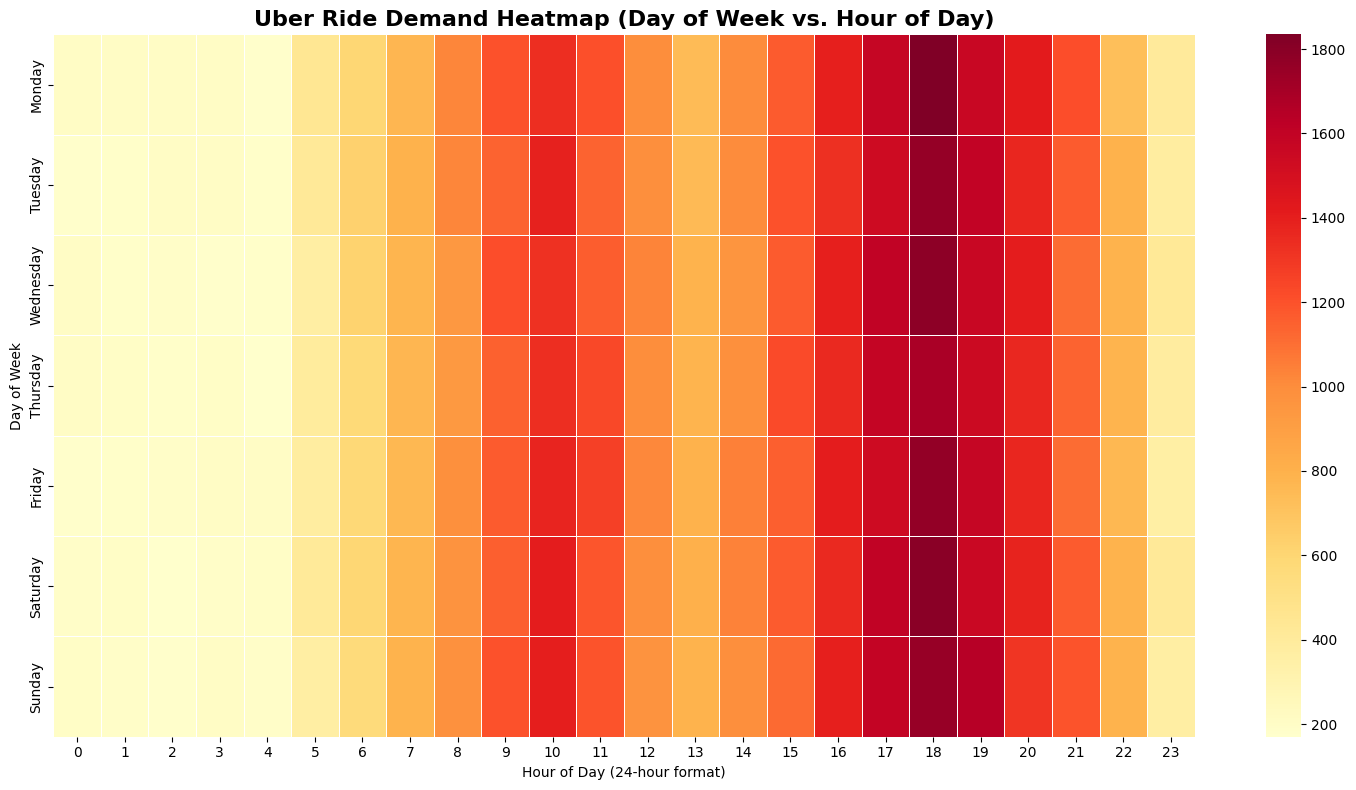

In [11]:
# Create the 'Hour' and 'DayOfWeek' columns from the 'DateTime' column
df['Hour'] = df['DateTime'].dt.hour
df['DayOfWeek'] = df['DateTime'].dt.day_name()

# Group the data by day and hour to count rides, and format it for the heatmap
heatmap_data = df.groupby(['DayOfWeek', 'Hour']).size().unstack(fill_value=0)
# Reorder the days of the week into a logical sequence
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
heatmap_data = heatmap_data.reindex(days_order)
# Create the plot figure
plt.figure(figsize=(15, 8))
# Generate the heatmap using seaborn
sns.heatmap(heatmap_data, cmap="YlOrRd", linewidths=0.5)
# Add titles and labels for clarity
plt.title("Uber Ride Demand Heatmap (Day of Week vs. Hour of Day)", fontsize=16, weight='bold')
plt.xlabel("Hour of Day (24-hour format)")
plt.ylabel("Day of Week")

# Ensure labels fit nicely
plt.tight_layout()

# Save the plot as an image file
plt.savefig('ride_demand_heatmap.png')

print("Ride demand heatmap saved as 'ride_demand_heatmap.png'")

In [ ]:
#Conclusion:-
#Demand is highest in the evening hours (5 PM – 8 PM) across all days of the week.
#Demand is high across weekdays (Mon–Fri)
#Weekends also have the same trend but show slightly higher evening peaks, possibly due to leisure
#Low at night -> rises in the morning -> drops midday -> rises strongly in the evening.